# 1D inversion of magnetotelluric data
## Example 1: inversion of synthetic MT data

## 0. Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cofi
from cofi_espresso import Magnetotelluric1D

### Create synthetic data given a simple 3 layers Earth model

In [2]:
mt = Magnetotelluric1D(example_number=1)

#### 0.1. Define a synthetic resistivity model and plot it

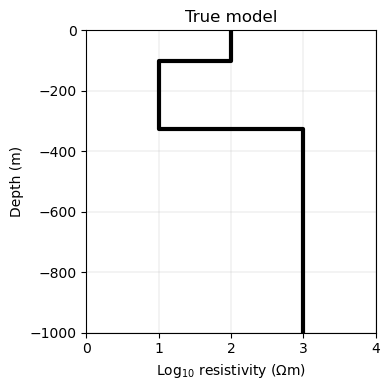

In [3]:
fig = mt.plot_model(mt.good_model, title='True model')

#### 0.2. Load and plot responses of this model (plus added noise)

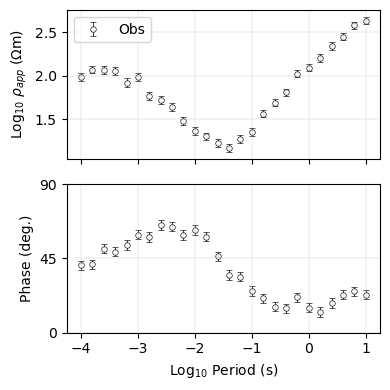

In [4]:
fig = mt.plot_data(mt.data, Cm = mt.covariance_matrix)


## 1. Define the problem

In [5]:
# get problem information from espresso magnetotelluric1D
model_size = mt.model_size         # number of model parameters
data_size = mt.data_size           # number of data points
start_logres = mt.starting_model   # starting model

In [6]:
# define CoFI BaseProblem
mt_problem = cofi.BaseProblem()
mt_problem.set_initial_model(start_logres)

In [7]:
# add regularization: smoothing
smoothing_factor = 1
#reg_smoothing = cofi.utils.QuadraticReg(smoothing_factor, model_size = model_size, reg_type = "roughening")
reg_smoothing = cofi.utils.QuadraticReg(smoothing_factor, model_size = model_size, reg_type = "smoothing")
reg = reg_smoothing
reg.model_size


50

In [8]:
def objective_func(logres, reg):
    dpred = mt.forward(logres)
    data_misfit = mt.misfit(mt.data,dpred,mt.inverse_covariance_matrix)
    model_reg = reg(logres)
    return  data_misfit + model_reg

In [9]:
mt_problem.set_objective(objective_func, args=[reg])

In [10]:
#mt_problem.summary()

## 2. Define the inversion options

In [11]:
#mt_problem.suggest_tools();

In [12]:
my_options = cofi.InversionOptions()
my_options.set_tool("scipy.optimize.minimize")
my_options.set_params(method="L-BFGS-B",options={'ftol':1e-3,'maxiter': 100})

## 3. Start an inversion

In [13]:
inv = cofi.Inversion(mt_problem, my_options)
inv_result = inv.run()
inv_result.summary()

Summary for inversion result
SUCCESS
----------------------------
fun: 0.8173603461337595
jac: [ 1.13677179e-02 -2.17521558e-02 -4.20985471e-04 -7.96407389e-03
 -5.31901193e-03 -2.80305558e-02 -1.67007187e-02 -7.23863196e-03
 -1.93790096e-02 -3.56768728e-02 -2.60844681e-03  1.32731382e-02
  7.38213931e-03  7.68075599e-03  6.64760473e-03  1.37679646e-02
  2.93608695e-02  2.65658719e-02  2.16649366e-02  5.10622658e-03
 -7.50531863e-03 -2.24021247e-02 -1.11575194e-02  5.94262421e-03
  4.86899413e-04 -1.75140570e-02 -2.18768782e-02 -7.44770916e-03
  1.22429845e-03  4.16409132e-03  3.49760223e-03 -5.05002709e-03
 -1.19122046e-02 -6.00193232e-03  1.65327086e-02  2.75425240e-02
  1.37841739e-02  7.26446685e-03  9.18931603e-05 -1.07367449e-02
 -1.03047682e-02  1.34733225e-02  2.57830758e-02  2.02459495e-02
  7.14611707e-03  2.60524937e-04  2.62367907e-04  5.09181589e-04
 -2.33033261e-02 -3.50794951e-03]
nfev: 1938
njev: 38
nit: 34
status: 0
message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPS

## 4. Plotting results

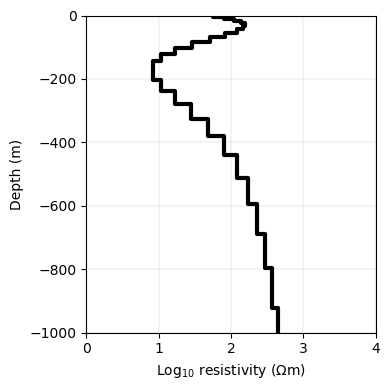

In [14]:
fig = mt.plot_model(inv_result.model);            # inverted model

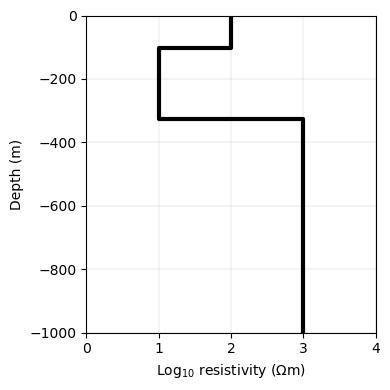

In [15]:
fig = mt.plot_model(mt.good_model);       # true model

nRMSE = 0.863


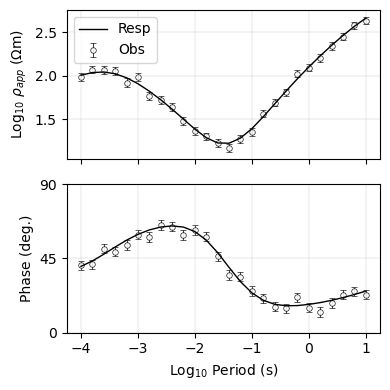

In [16]:
fig = mt.plot_data(mt.data, mt.forward(inv_result.model), Cm = mt.covariance_matrix)
#float(np.sqrt(1/self.data_size * (res.T @ Cm_inv @ res)))
nRMSE = np.sqrt(mt.misfit(mt.data, mt.forward(inv_result.model), Cm_inv = mt.inverse_covariance_matrix))
print('nRMSE = %.3f'%nRMSE)